In [ ]:
import os
import time

import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# DATA PREPROCESSING / CLEANING / VIZUALISATION



In [ ]:
dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#check the variables type
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
dataset.shape

(100000, 9)

In [ ]:
#change the gender column type
gender_mapping = {'Male': 0, 'Female': 1}  # Define a mapping from gender to integers
dataset['gender'] = dataset['gender'].map(gender_mapping)

In [ ]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,No Info,27.32,6.2,90,0
99996,1.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,0.0,66.0,0,0,former,27.83,5.7,155,0
99998,1.0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
diabete_preciction = {'Healthy': 0, 'Diabetes': 1}
smoke_category = {'never': 1, 'No Info': 2, 'current': 3, 'former': 4, 'ever': 5, 'not current': 6}

In [ ]:
#change the smoking_histrory column to numeric
dataset['smoking_history'] = dataset['smoking_history'].replace(smoke_category)

In [ ]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,1,25.19,6.6,140,0
1,1.0,54.0,0,0,2,27.32,6.6,80,0
2,0.0,28.0,0,0,1,27.32,5.7,158,0
3,1.0,36.0,0,0,3,23.45,5.0,155,0
4,0.0,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,2,27.32,6.2,90,0
99996,1.0,2.0,0,0,2,17.37,6.5,100,0
99997,0.0,66.0,0,0,4,27.83,5.7,155,0
99998,1.0,24.0,0,0,1,35.42,4.0,100,0


# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Select only numerical columns
numerical_columns = dataset.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
# Fit and transform the data
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
# Display the normalized DataFrame
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,1.000000,0.0,1.0,0.0,0.177171,0.563636,0.272727,0.0
1,1.0,0.674675,0.0,0.0,0.2,0.202031,0.563636,0.000000,0.0
2,0.0,0.349349,0.0,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,1.0,0.449449,0.0,0.0,0.4,0.156863,0.272727,0.340909,0.0
4,0.0,0.949950,1.0,1.0,0.4,0.118231,0.236364,0.340909,0.0
...,...,...,...,...,...,...,...,...,...
99995,1.0,1.000000,0.0,0.0,0.2,0.202031,0.490909,0.045455,0.0
99996,1.0,0.024024,0.0,0.0,0.2,0.085901,0.545455,0.090909,0.0
99997,0.0,0.824825,0.0,0.0,0.6,0.207983,0.400000,0.340909,0.0
99998,1.0,0.299299,0.0,0.0,0.0,0.296569,0.090909,0.090909,0.0


# Data Cleaning

In [ ]:
#missing values
dataset.isnull().sum()

gender                 18
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [ ]:
#delete the missing values in column gender
dataset.dropna(subset='gender', inplace=True)

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Data Visualization

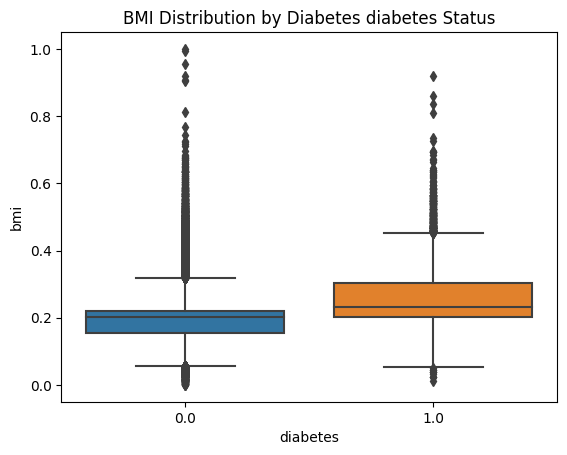

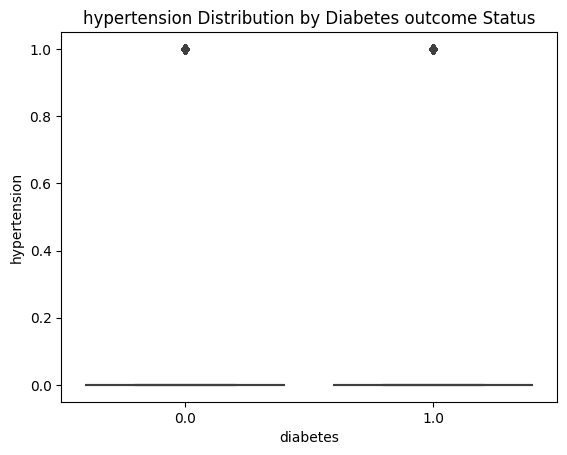

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


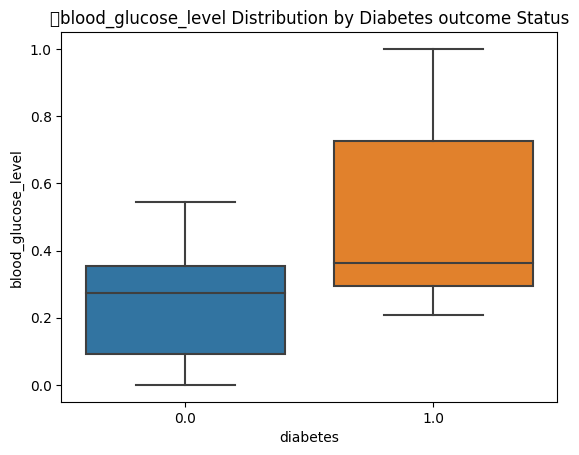

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


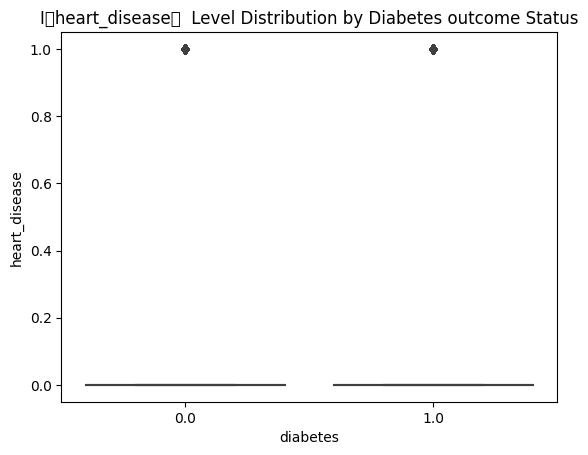

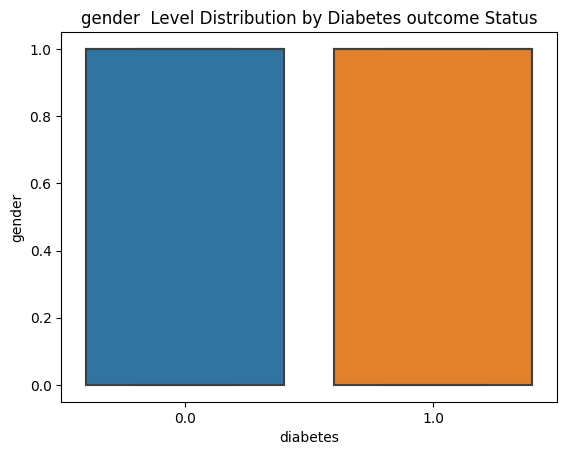

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


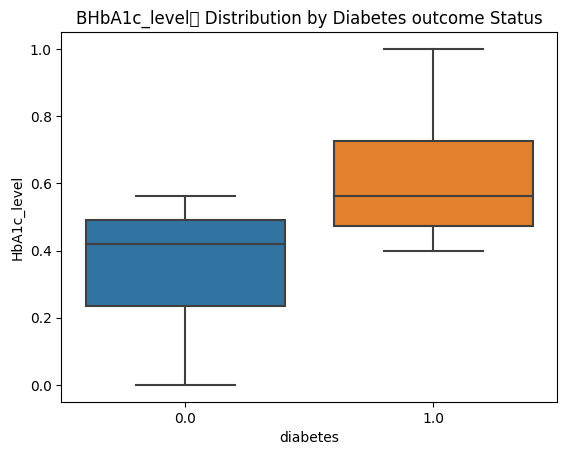

In [ ]:
#Highlighting The major factors that causes diabetes using boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="diabetes", y="bmi", data=dataset)
plt.title("BMI Distribution by Diabetes diabetes Status")
plt.show()
sns.boxplot(x="diabetes", y="hypertension", data=dataset)
plt.title("hypertension Distribution by Diabetes outcome Status")
plt.show()
sns.boxplot(x="diabetes", y="blood_glucose_level", data=dataset)
plt.title("	blood_glucose_level Distribution by Diabetes outcome Status")
plt.show()
sns.boxplot(x="diabetes", y="heart_disease", data=dataset)
plt.title("I	heart_disease	  Level Distribution by Diabetes outcome Status")
plt.show()
sns.boxplot(x="diabetes", y="gender", data=dataset)
plt.title("gender  Level Distribution by Diabetes outcome Status")
plt.show()
sns.boxplot(x="diabetes", y="HbA1c_level", data=dataset)
plt.title("BHbA1c_level	 Distribution by Diabetes outcome Status")
plt.show()

In [ ]:
values=dataset.columns
values

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<ipython-input-18-9f1acc06810a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=dataset, x=name, hue="diabetes", kde=True, palette=custom_palette)
<ipython-input-18-9f1acc06810a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=dataset, x=name, hue="diabetes", kde=True, palette=custom_palette)
<ipython-input-18-9f1acc06810a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=dataset, x=name, hue="diabetes", kde=True, palette=custom_palette)
<ipython-input-18-9f1acc06810a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=dataset, x=name, hue="diabetes", kde=True, palette=custom_palette)
<ipython-input-18-9f1acc06810a>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  

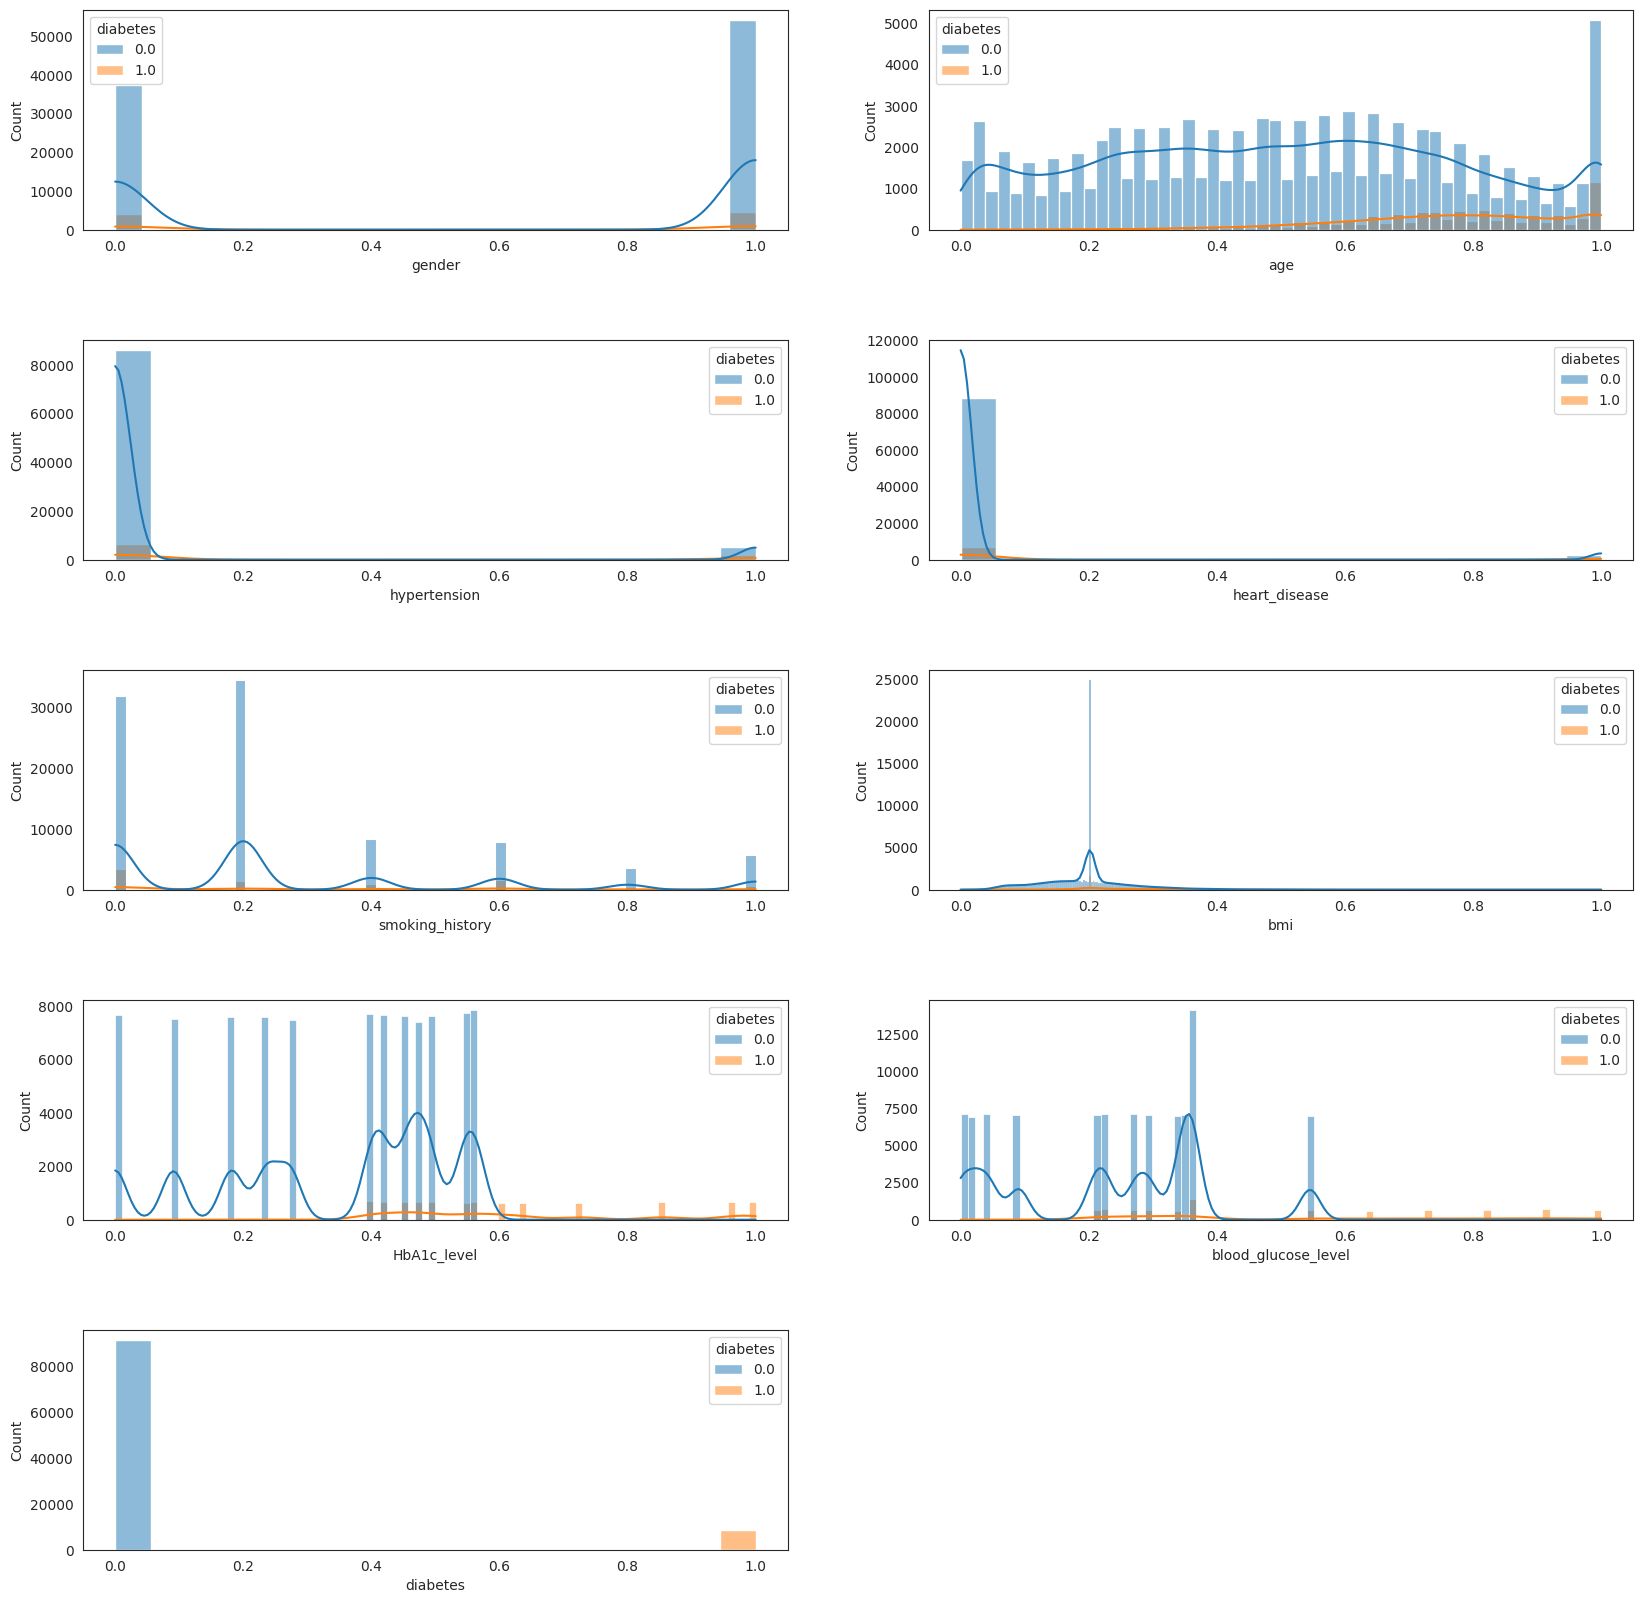

In [ ]:
plt.figure(figsize = (20,20))
sns.set_style("white")
sns.set_palette("dark")
plt.subplots_adjust(hspace=0.5)
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
i = 1;
for name in values:
    plt.subplot(5,2,i)
    sns.histplot(data=dataset, x=name, hue="diabetes", kde=True, palette=custom_palette)
    i = i + 1

In [ ]:
values1=dataset.columns
values1

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
values1 = values1.drop("diabetes")
values1

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

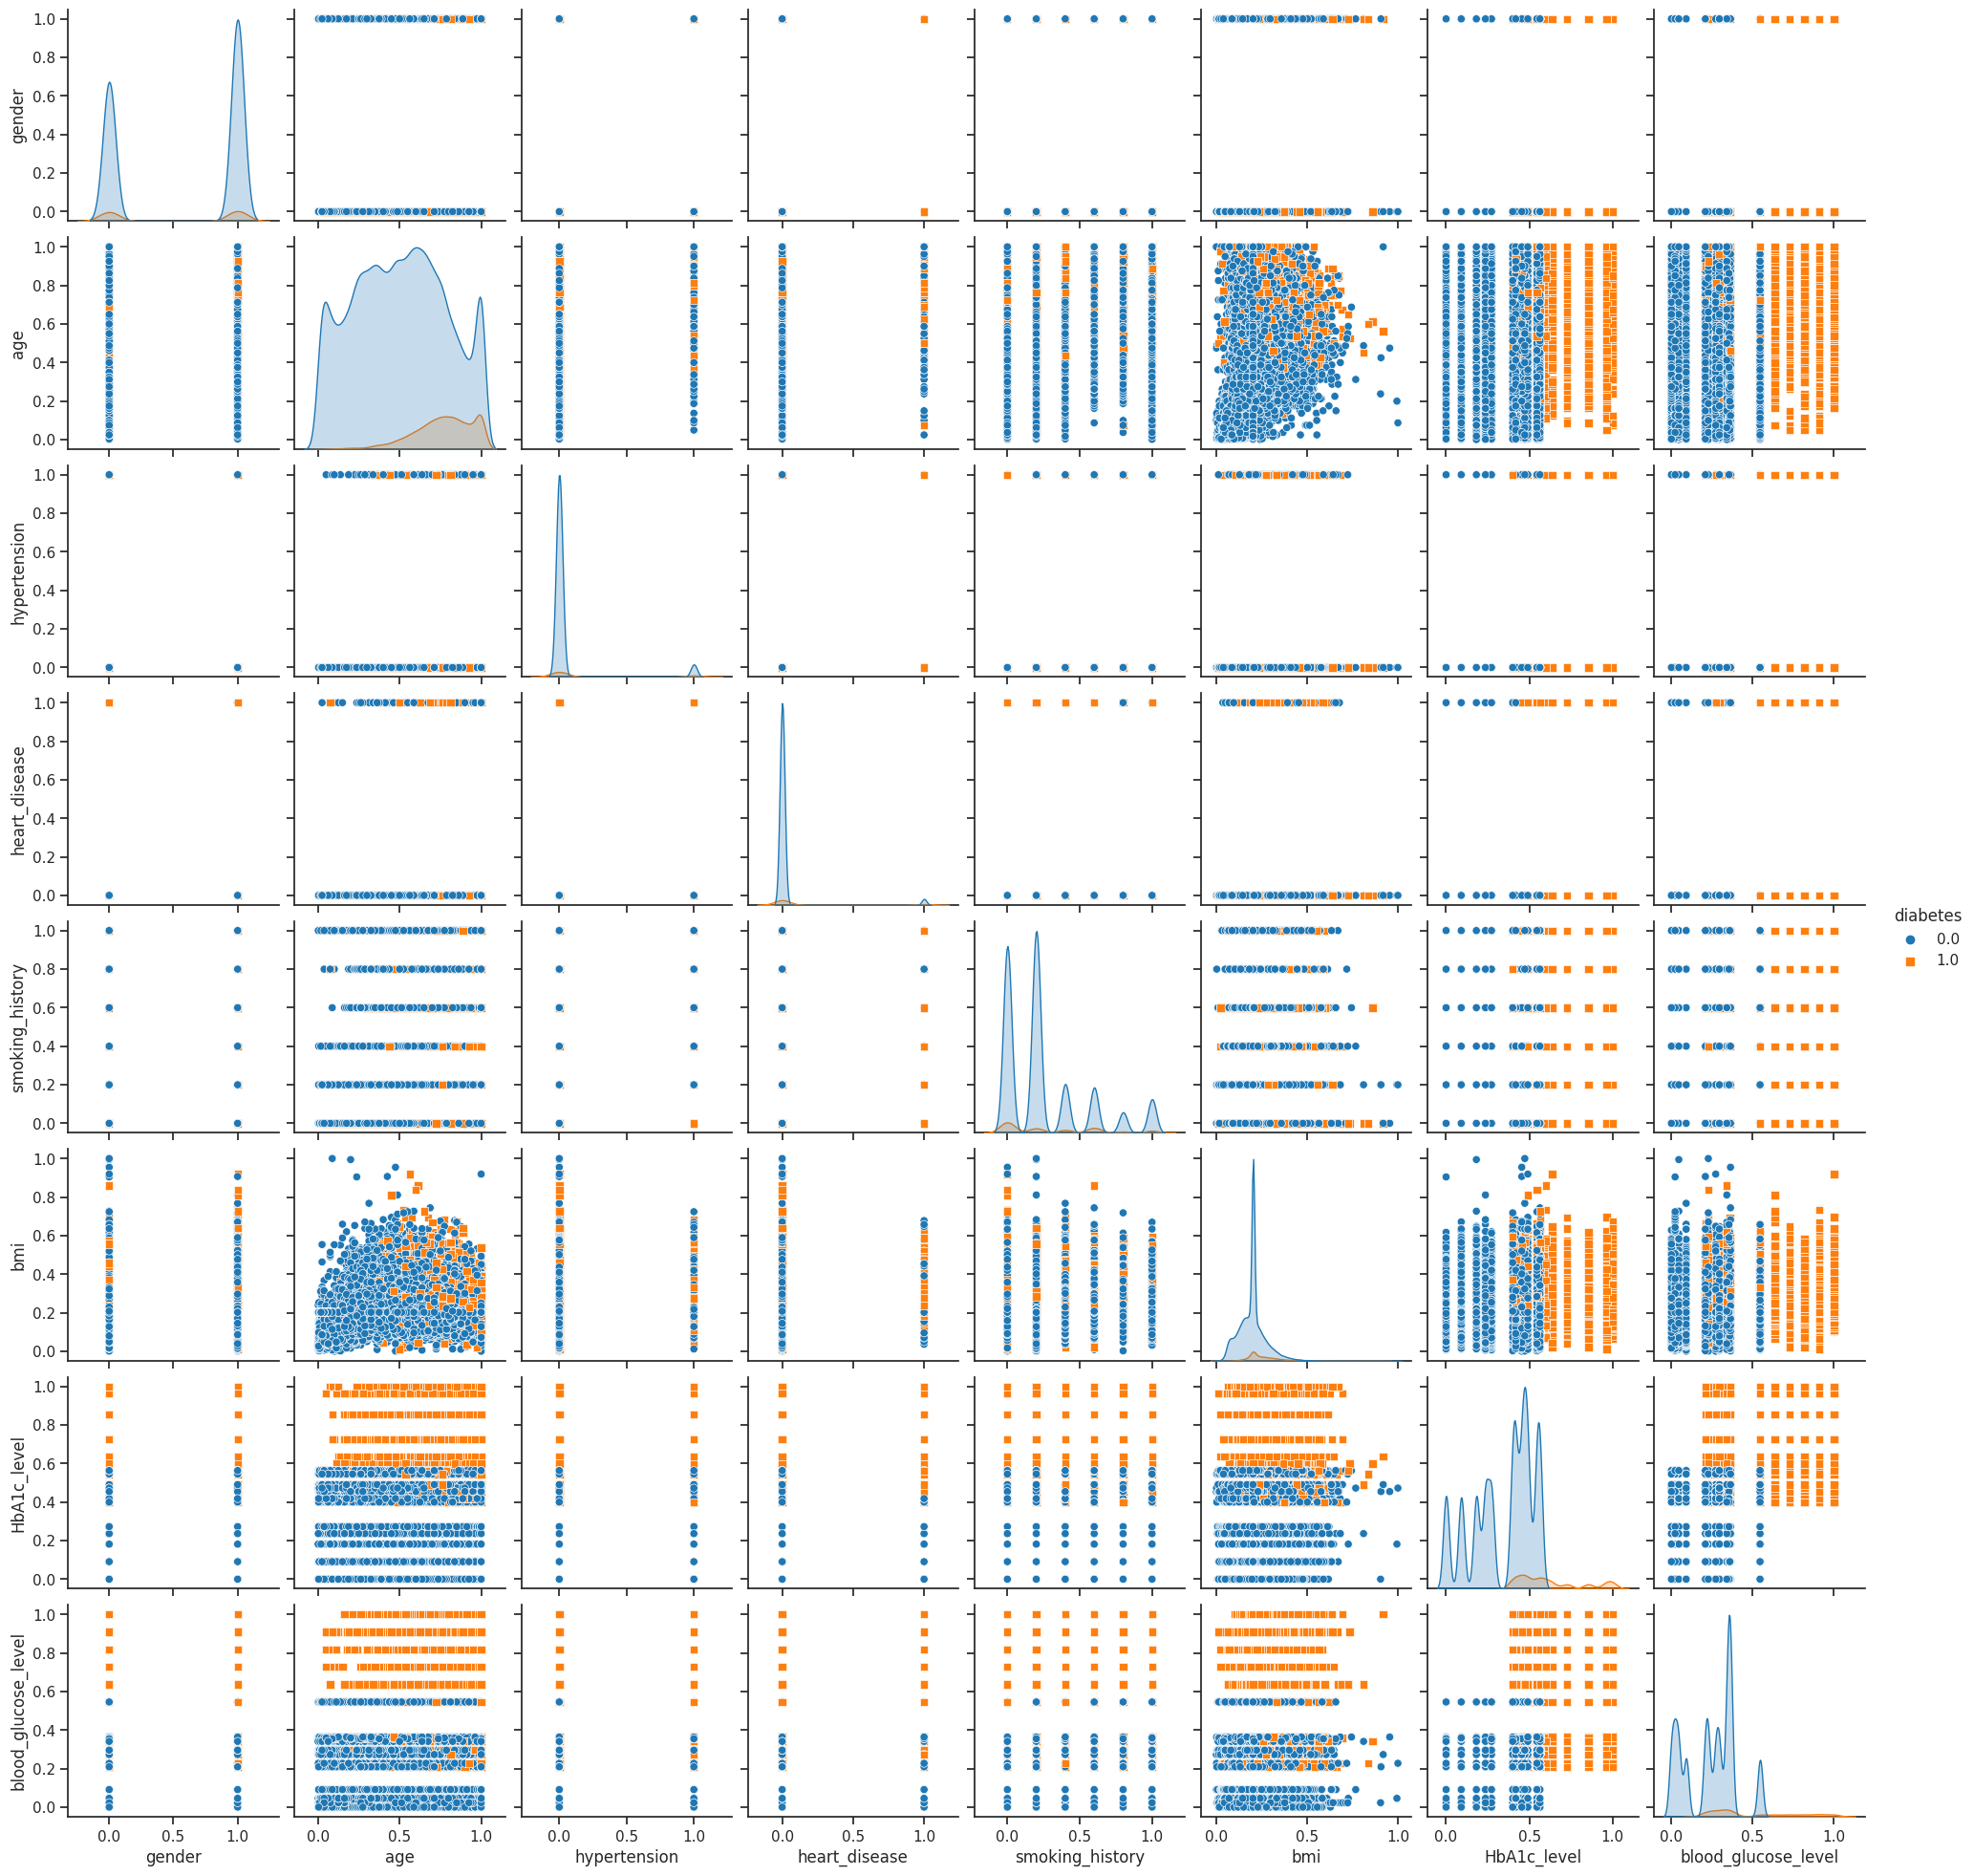

In [ ]:
# Assuming 'values1' contains the names of columns excluding 'diabetes'
plot_data = dataset[values1.tolist() + ["diabetes"]]

# Set a custom color palette for better differentiation
custom_palette = ["#1f77b4", "#ff7f0e"]

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(plot_data, hue="diabetes", palette=custom_palette, markers=["o", "s"])

plt.show()


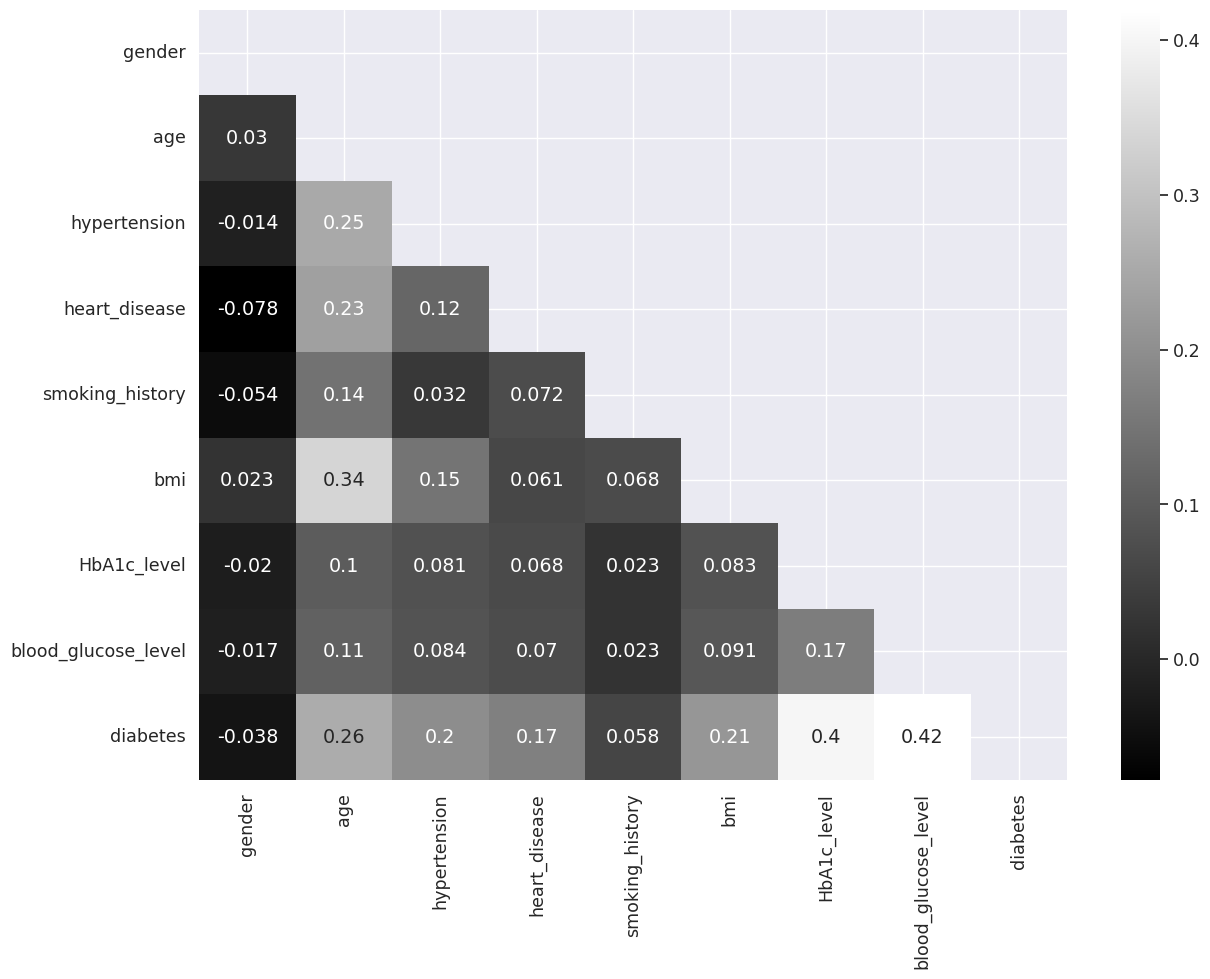

In [ ]:
#correlation
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
crr = dataset.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(crr, annot = True, linecolor = "red",cmap='gist_yarg_r', mask=mask ,cbar=True)
plt.show()

# SPLIT THE DATA

In [ ]:
train_size = 0.7 #70% for training
valid_size = 0.1 #10% for testing
test_size = 0.2  #20% for validate the prediction

In [ ]:
train_idx = int(len(dataset) * train_size)
test_idx = int(len(dataset) * (train_size + test_size))
def split_data(a, b):
    x = dataset.iloc[a:b]
    y = x['diabetes']
    x = x.drop('diabetes', axis=1)
    return (x, y)
train_x, train_y = split_data(None, train_idx)
test_x, test_y = split_data(train_idx, None)
valid_x, valid_y = split_data(test_idx, None)

In [ ]:
{'train': train_x.shape, 'test': test_x.shape, 'valid': valid_x.shape}

{'train': (69987, 8), 'test': (29995, 8), 'valid': (9999, 8)}

# DATA TRAINING

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(train_x.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=100, batch_size=30, verbose=2, validation_data=(valid_x, valid_y))

Epoch 1/100
2333/2333 - 6s - loss: 0.2237 - accuracy: 0.9313 - val_loss: 0.1246 - val_accuracy: 0.9597 - 6s/epoch - 2ms/step
Epoch 2/100
2333/2333 - 5s - loss: 0.1328 - accuracy: 0.9549 - val_loss: 0.1170 - val_accuracy: 0.9601 - 5s/epoch - 2ms/step
Epoch 3/100
2333/2333 - 5s - loss: 0.1272 - accuracy: 0.9572 - val_loss: 0.1143 - val_accuracy: 0.9610 - 5s/epoch - 2ms/step
Epoch 4/100
2333/2333 - 4s - loss: 0.1240 - accuracy: 0.9572 - val_loss: 0.1131 - val_accuracy: 0.9604 - 4s/epoch - 2ms/step
Epoch 5/100
2333/2333 - 5s - loss: 0.1224 - accuracy: 0.9576 - val_loss: 0.1130 - val_accuracy: 0.9608 - 5s/epoch - 2ms/step
Epoch 6/100
2333/2333 - 5s - loss: 0.1202 - accuracy: 0.9580 - val_loss: 0.1106 - val_accuracy: 0.9603 - 5s/epoch - 2ms/step
Epoch 7/100
2333/2333 - 4s - loss: 0.1190 - accuracy: 0.9581 - val_loss: 0.1108 - val_accuracy: 0.9605 - 4s/epoch - 2ms/step
Epoch 8/100
2333/2333 - 5s - loss: 0.1191 - accuracy: 0.9577 - val_loss: 0.1097 - val_accuracy: 0.9613 - 5s/epoch - 2ms/step


In [ ]:
#save the model
model_diabete_prediction=model.save("/content/model")

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("/content/model")

In [ ]:
y_pred = model.predict(test_x.iloc[1:35])

2/2 [==============================] - 0s 5ms/step


In [ ]:
binary_predictions = np.round(y_pred)
percentage_predictions = (y_pred* 100).flatten()
# Print or use the predictions as needed
print("Raw Predictions percentge :", percentage_predictions)
#These are the binary predictions obtained by rounding the raw probabilities. The threshold for rounding is typically 0.5. If the raw probability is greater than or equal to 0.5, it is rounded to 1 (indicating diabetes); otherwise, it is rounded to 0 (indicating healthy).
#For example, the first binary prediction [0.] indicates that, after rounding, the model classifies the first example as negative (0), suggesting that it's predicted to be healthy.
print("Binary Predictions:", binary_predictions)

Raw Predictions percentge : [1.8223661e+01 1.2898701e-09 2.5372673e-04 2.2239788e-27 2.8042423e-06
 5.0534711e+00 1.3228392e-11 9.9995872e+01 8.8379068e+00 8.7933903e+00
 2.6859459e-10 1.0459947e-08 8.8061810e-08 2.7328517e-02 2.7286537e+00
 2.7683091e+00 5.5589777e-09 3.8190961e+00 3.2053385e+00 1.6386502e-05
 4.9927991e-08 2.0220659e+00 2.4424631e+01 2.3395228e+00 1.4291261e+01
 9.8698082e+00 1.0029962e-11 8.4548070e-13 1.1581947e+00 2.2858966e-30
 1.7744485e-29 1.1866088e-03 4.1390100e+00 3.0875597e-08]
Binary Predictions: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
test_x.iloc[1:35]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
70003,0.0,0.386887,0.0,0.0,0.0,0.426704,0.563636,0.340909
70004,1.0,0.161662,0.0,0.0,0.2,0.100724,0.472727,0.022727
70005,0.0,0.799800,0.0,0.0,0.2,0.211018,0.272727,0.295455
70006,1.0,0.336837,0.0,0.0,0.0,0.227824,0.000000,0.359091
70007,1.0,0.449449,0.0,0.0,0.0,0.255019,0.272727,0.340909
70008,0.0,0.512012,0.0,0.0,0.4,0.202031,0.563636,0.227273
70009,0.0,0.224224,0.0,0.0,0.4,0.138422,0.418182,0.022727
70010,1.0,0.687187,0.0,0.0,0.0,0.351657,0.636364,0.209091
70011,1.0,0.649650,1.0,0.0,0.0,0.146475,0.472727,0.209091
70012,1.0,0.574575,0.0,0.0,0.2,0.264472,0.545455,0.227273


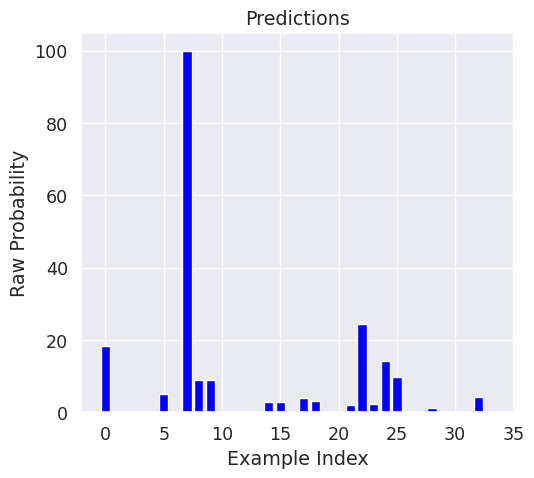

In [ ]:
# Generate indices for each example
indices = np.arange(len(percentage_predictions))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(indices, percentage_predictions.flatten(), color='blue')
plt.title('Predictions')
plt.xlabel('Example Index')
plt.ylabel('Raw Probability')
plt.tight_layout()
plt.show()

In [ ]:
min_length = min(len(test_y), len(binary_predictions))
result = pd.DataFrame()
result['Actual Label'] = test_y[:min_length]
result['Prediction'] = binary_predictions[:min_length]

In [ ]:
result.sample(11)

,Actual Label,Prediction
70022,0.0,0.0
70012,0.0,0.0
70023,0.0,0.0
70009,0.0,1.0
70010,1.0,0.0
70019,0.0,0.0
70003,1.0,0.0
70027,0.0,0.0
70017,0.0,0.0
70018,0.0,0.0


In [ ]:
accuracy = accuracy_score(test_y.iloc[1:35], binary_predictions)
recall = recall_score(test_y.iloc[1:35], binary_predictions)
precision = precision_score(test_y.iloc[1:35], binary_predictions)
f1 = f1_score(test_y.iloc[1:35], binary_predictions)

# Print the results
print('Accuracy:', round(accuracy, 3) * 100, '%')
print('Recall:', round(recall, 3) * 100, '%')
print('Precision:', round(precision, 3) * 100, '%')
print('F1 Score:', round(f1, 3) * 100, '%')

Accuracy: 97.1 %
Recall: 50.0 %
Precision: 100.0 %
F1 Score: 66.7 %
